# Introduction

**Write some background info on sP waves**

## Data preparation

Write about how I prepared and collected the data

# Exploratory Data Analysis

## Loading data

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import pickle

In [3]:
def retrieveVariables(filename):
    variables = []
    with open(str(filename), 'rb') as file:
        variables = pickle.load(file)
    return variables

wdir = "./"

# read in data
[envelop_signal, sPmP_time, sPmP_label, 
 dist, evdp, mag, stlo, 
 stla, evlo, evla, evid, 
 fname] = retrieveVariables(f"{wdir}/data/c_readindata")


In [24]:
df = pd.DataFrame()
arr_list = [row for row in envelop_signal]
df["envelope_signal"] = arr_list
df["sPmP_time"] = sPmP_time
df["sPmP_label"] = sPmP_label
df["dist"] = dist
df["evdp"] = evdp
df["mag"] = mag
df["stlo"] = stlo
df["stla"] = stla
df["evlo"] = evlo
df["evla"] = evla
df["evid"] = evid
df["fname"] = fname
df

,envelope_signal,sPmP_time,sPmP_label,dist,evdp,mag,stlo,stla,evlo,evla,evid,fname
0,"[1.4300437e-07, 7.03409e-08, 7.8110894e-08, 5....",5.072475,1,74.032509,8.44,2.19,-118.016487,35.152519,-117.487999,35.660500,39913943,20220116124930000.CI.CCA
1,"[4.2672582e-07, 1.09194275e-07, 1.3851862e-07,...",3.601901,1,96.090866,11.85,2.42,-115.304359,33.238541,-115.217827,32.375172,39929439,20220201012424220.CI.SLV
2,"[1.5545314e-08, 1.6448691e-08, 1.1169714e-08, ...",3.576212,1,82.756546,8.44,2.19,-117.696289,34.934391,-117.487999,35.660500,39913943,20220116124930000.CI.LMR2
3,"[1.2666386e-07, 2.1184671e-07, 1.4236237e-07, ...",9.662176,1,46.518520,7.29,2.54,-118.420792,35.291302,-118.732826,34.959499,39913455,20220115161902000.CI.TEH
4,"[7.6519356e-08, 2.3339777e-07, 1.5352204e-07, ...",4.871820,1,81.210190,15.88,2.75,-116.028801,32.553501,-115.182671,32.405499,39913895,20220116091814410.BC.RMX
...,...,...,...,...,...,...,...,...,...,...,...,...
2116,"[4.205347e-08, 2.6539585e-08, 1.5673528e-08, 2...",3.593528,0,152.513260,11.02,3.62,-116.607498,32.568699,-117.478668,33.732330,40178728,20220206232447510.BC.TKX
2117,"[3.7519725e-09, 4.7223785e-09, 5.6398854e-09, ...",8.093572,0,355.969727,11.02,3.62,-119.022820,36.680111,-117.478668,33.732330,40178728,20220206232447510.BK.HELL00
2118,"[1.4307117e-08, 1.3774584e-08, 1.3080769e-08, ...",4.564327,0,202.918198,11.02,3.62,-119.224968,34.848431,-117.478668,33.732330,40178728,20220206232447510.CI.ABL
2119,"[3.4011073e-08, 3.402922e-08, 3.3143152e-08, 3...",3.383217,0,139.318970,11.02,3.62,-116.303383,32.954601,-117.478668,33.732330,40178728,20220206232447510.CI.ACP


## Variables in that data

`envelop_signal` 

`sPmP_time`
`sPmP_label`
`dist`
`evdp`
`mag`
`stlo`
`stla`
`evlo`
`evla`
`evid`
`fname`

In [29]:
len(envelop_signal)

2121

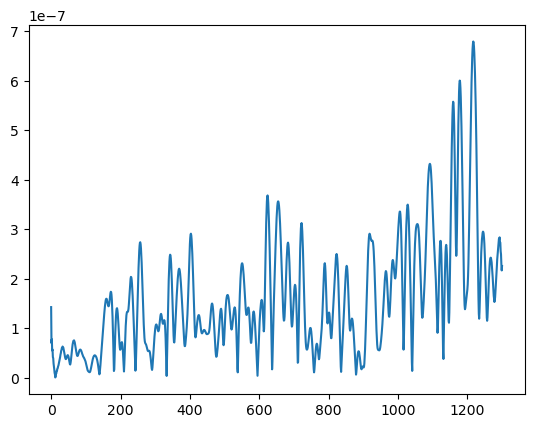

In [30]:
plt.plot(envelop_signal[0])

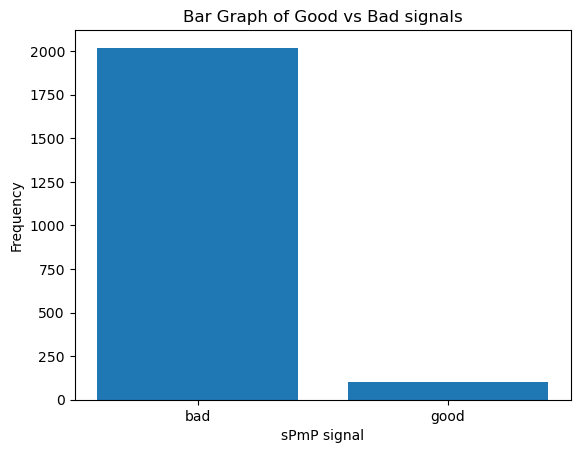

In [34]:
labels = ['good' if x == 1 else 'bad' for x in sPmP_label]

# count the frequency of each label
unique_labels, label_counts = np.unique(labels, return_counts=True)

# create a bar graph of the frequency counts
plt.bar(unique_labels, label_counts)

# set the x-axis label and y-axis label
plt.xlabel('sPmP signal')
plt.ylabel('Frequency')

# set the title of the plot
plt.title('Bar Graph of Good vs Bad signals')

# display the plot
plt.show()

## Correlation plot

In [5]:
import seaborn as sns

In [11]:
df.dtypes

sPmP_time     float32
sPmP_label      int64
dist          float32
evdp          float32
mag           float32
stlo          float32
stla          float32
evlo          float32
evla          float32
evid            int32
fname          object
dtype: object

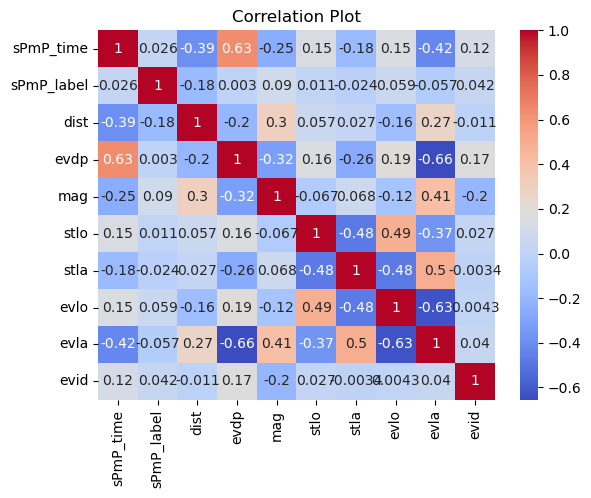

In [25]:
numeric_cols = df.select_dtypes(include=['int', 'float']).columns.tolist()

# create a correlation matrix
corr_matrix = df[numeric_cols].corr()

# create a heatmap of the correlation matrix using seaborn
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# set the title of the plot
plt.title('Correlation Plot')

# display the plot
plt.show()